In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import time
import plotly.express as px
from datetime import datetime

In [2]:
pre = pd.read_csv('./Pre_Season_Batter.csv') #프리시즌
regular = pd.read_csv('./statiz.csv') # 정규시즌

In [3]:
pre.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1393 entries, 0 to 1392
Data columns (total 29 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   batter_id        1393 non-null   int64  
 1   batter_name      1393 non-null   object 
 2   year             1393 non-null   int64  
 3   team             1393 non-null   object 
 4   avg              1393 non-null   object 
 5   G                1393 non-null   int64  
 6   AB               1393 non-null   int64  
 7   R                1393 non-null   int64  
 8   H                1393 non-null   int64  
 9   2B               1393 non-null   int64  
 10  3B               1393 non-null   int64  
 11  HR               1393 non-null   int64  
 12  TB               1393 non-null   int64  
 13  RBI              1393 non-null   int64  
 14  SB               1393 non-null   int64  
 15  CS               1393 non-null   int64  
 16  BB               1393 non-null   int64  
 17  HBP           

In [4]:
regular.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10023 entries, 0 to 10022
Data columns (total 29 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   선수      10023 non-null  object 
 1   G       10023 non-null  int64  
 2   타석      10023 non-null  int64  
 3   타수      10023 non-null  int64  
 4   득점      10023 non-null  int64  
 5   안타      10023 non-null  int64  
 6   2타      10023 non-null  int64  
 7   3타      10023 non-null  int64  
 8   홈런      10023 non-null  int64  
 9   루타      10023 non-null  int64  
 10  타점      10023 non-null  int64  
 11  도루      10023 non-null  int64  
 12  도실      10023 non-null  int64  
 13  볼넷      10023 non-null  int64  
 14  사구      10023 non-null  int64  
 15  고4      10023 non-null  int64  
 16  삼진      10023 non-null  int64  
 17  병살      10023 non-null  int64  
 18  희타      10023 non-null  int64  
 19  희비      10023 non-null  int64  
 20  타율      7623 non-null   float64
 21  출루      8023 non-null   float64
 22

In [5]:
# 데이터 요약
pre.describe()

,batter_id,year,G,AB,R,H,2B,3B,HR,TB,...,SB,CS,BB,HBP,SO,GDP,SLG,OBP,E,OPS
count,1393.000000,1393.000000,1393.000000,1393.000000,1393.000000,1393.000000,1393.000000,1393.000000,1393.000000,1393.000000,...,1393.000000,1393.000000,1393.000000,1393.000000,1393.000000,1393.000000,1364.000000,1368.000000,1393.000000,1364.000000
mean,173.434314,2013.014358,8.705671,19.201723,2.679828,5.021536,0.954774,0.119885,0.391960,7.391960,...,0.629576,0.291457,1.877961,0.330223,3.714286,0.447236,0.361012,0.317912,0.381910,0.676924
std,94.716851,4.166757,5.562686,13.395946,2.637212,4.232584,1.196904,0.379976,0.748557,6.538787,...,1.146854,0.595522,2.053392,0.642204,3.180884,0.723364,0.269892,0.151489,0.729521,0.386933
min,0.000000,2002.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,99.000000,2010.000000,6.000000,9.000000,1.000000,2.000000,0.000000,0.000000,0.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.217000,0.250000,0.000000,0.472000
50%,178.000000,2014.000000,9.000000,18.000000,2.000000,4.000000,1.000000,0.000000,0.000000,6.000000,...,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000,0.344500,0.333000,0.000000,0.675000
75%,254.000000,2017.000000,11.000000,28.000000,4.000000,8.000000,2.000000,0.000000,1.000000,11.000000,...,1.000000,0.000000,3.000000,1.000000,5.000000,1.000000,0.478000,0.400000,1.000000,0.867000
max,344.000000,2018.000000,119.000000,183.000000,35.000000,51.000000,11.000000,4.000000,5.000000,68.000000,...,9.000000,4.000000,21.000000,4.000000,36.000000,5.000000,4.000000,1.000000,5.000000,5.000000


In [6]:
#결측치 확인
pre.isnull().sum()

batter_id            0
batter_name          0
year                 0
team                 0
avg                  0
G                    0
AB                   0
R                    0
H                    0
2B                   0
3B                   0
HR                   0
TB                   0
RBI                  0
SB                   0
CS                   0
BB                   0
HBP                  0
SO                   0
GDP                  0
SLG                 29
OBP                 25
E                    0
height/weight        0
year_born            0
position             0
career               0
starting_salary    214
OPS                 29
dtype: int64

In [8]:
# matplotlib 한글 출력 가능하도록 만들기
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

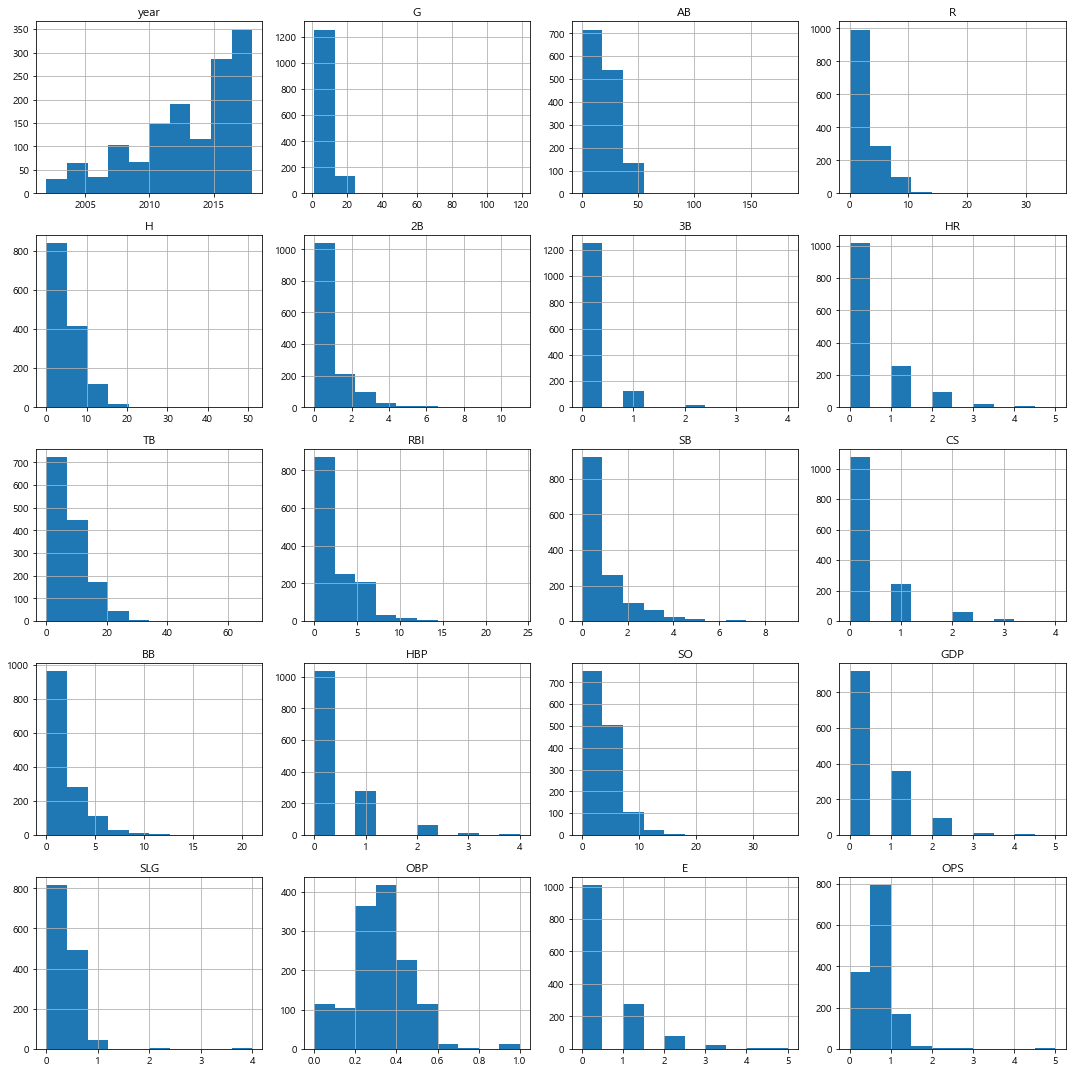

In [9]:
#수치형 데이터 분포도 확인
#프리시즌 
pre.iloc[:, 1:].hist(figsize=(15,15))
plt.tight_layout()
plt.show()

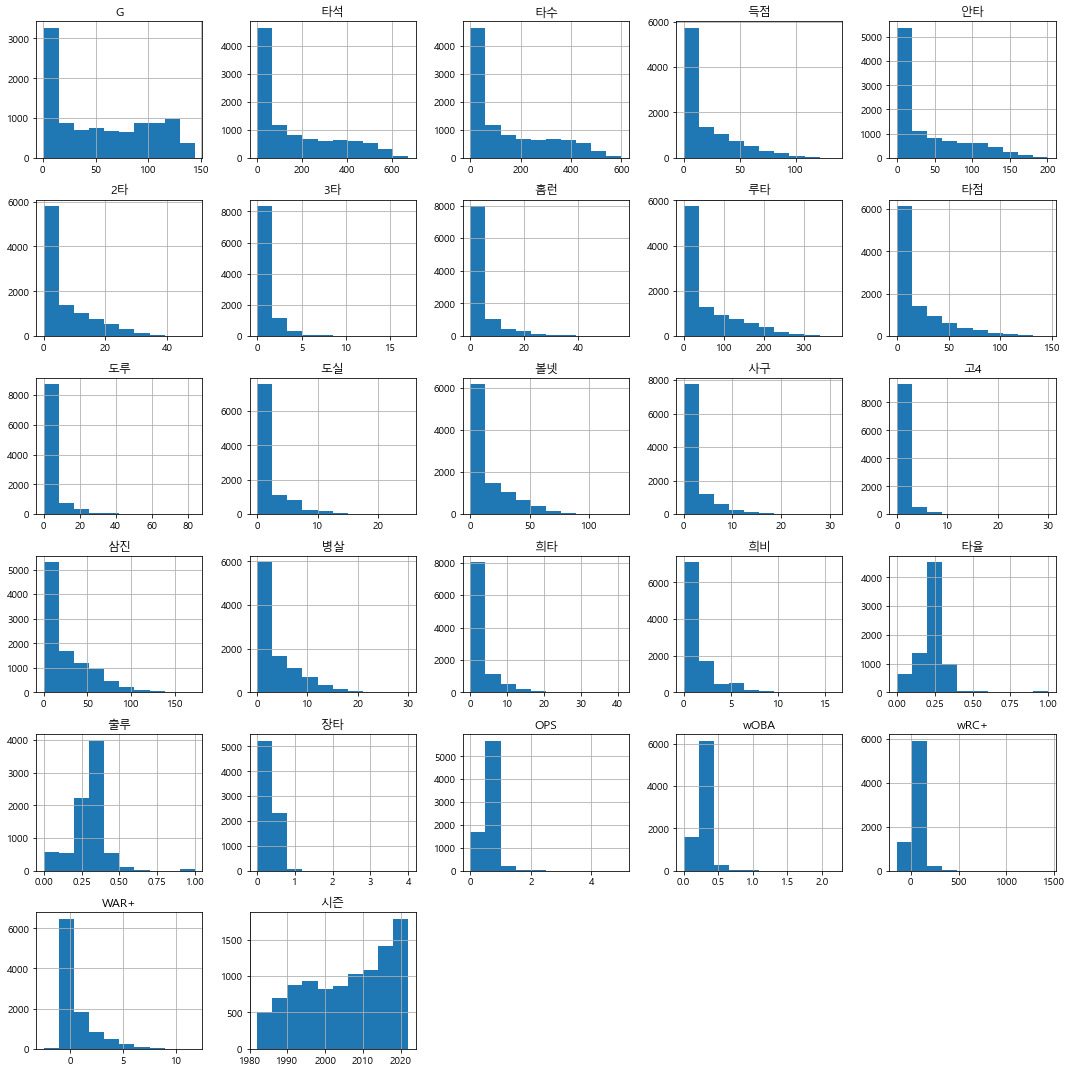

In [10]:
#정규시즌 
regular.iloc[:, 1:].hist(figsize=(15,15))
plt.tight_layout()
plt.show()

- 프리시즌과 정규시즌을 비교해보면 정규시즌에 비해 프리시즌의 경기수가 적기때문에 데이터가 부족한 것을 볼 수 있다.
- 정규시즌이 프리시즌에 비해 값의 범위가 더 넓어졌다.
- 프리시즌 데이터들은 0에 치우쳐 있던 것에 비해, 정규시즌 데이터들은 0이 아닌 값들로 분포를 이루고 있다.

# 프리시즌과 정규시즌의 상관관계
- 위에서 데이터 차이확인
- 그해의 정규시즌의 선수리스트 자료와 프리시즌 선수 리스트의 자료의 교집합있나 확인

In [11]:
regular['시즌']

0        1994
1        2015
2        2003
3        1997
4        1996
         ... 
10018    2022
10019    1999
10020    2018
10021    2007
10022    1986
Name: 시즌, Length: 10023, dtype: int64

In [12]:
pre['year']

0       2018
1       2011
2       2014
3       2015
4       2016
        ... 
1388    2014
1389    2015
1390    2016
1391    2018
1392    2014
Name: year, Length: 1393, dtype: int64

In [13]:
regular['new_idx']= regular['시즌'].apply(str)+regular['이름']
pre['new_idx']= pre['year'].apply(str)+pre['batter_name']

In [14]:
regular['new_idx'].str[4:7]

0        이종범
1        테임즈
2        심정수
3        이종범
4        이종범
        ... 
10018    김헌곤
10019    김영진
10020    나균안
10021    이종범
10022    권두조
Name: new_idx, Length: 10023, dtype: object

In [15]:
pre['new_idx'].str[4:7]

0       가르시
1       강경학
2       강경학
3       강경학
4       강경학
       ... 
1388    황재균
1389    황재균
1390    황재균
1391    황재균
1392    황진수
Name: new_idx, Length: 1393, dtype: object

In [16]:
set_new_idx1 = set(regular['new_idx'].str[4:7])
set_new_idx2 = set(pre['new_idx'].str[4:7])

list(set_new_idx1.intersection(set_new_idx2))

['양의지',
 '송민섭',
 '권정웅',
 '박광열',
 '김태완',
 '강민국',
 '김재성',
 '김사훈',
 '이범호',
 '이영욱',
 '주효상',
 '박민우',
 '김하성',
 '강승호',
 '김민식',
 '황진수',
 '하준호',
 '강경학',
 '이동훈',
 '윤정우',
 '나원탁',
 '임종혁',
 '박경수',
 '장민석',
 '오정복',
 '박헌도',
 '서동욱',
 '김헌곤',
 '강민호',
 '강백호',
 '이용규',
 '정수빈',
 '최정민',
 '김재환',
 '이재율',
 '장준원',
 '정병곤',
 '이성열',
 '최재훈',
 '송광민',
 '신종길',
 '장진혁',
 '최승준',
 '초이스',
 '오태곤',
 '문선재',
 '김응민',
 '오재일',
 '안익훈',
 '정범모',
 '김재율',
 '이성곤',
 '최영진',
 '홍재호',
 '허도환',
 '이해창',
 '양종민',
 '박준태',
 '박용택',
 '박석민',
 '러프',
 '이종욱',
 '호잉',
 '박건우',
 '박동원',
 '류지혁',
 '김진곤',
 '스크럭',
 '오선진',
 '이준수',
 '정주현',
 '최형우',
 '이택근',
 '손주인',
 '서건창',
 '버나디',
 '박지규',
 '박세혁',
 '이형종',
 '최윤석',
 '이원석',
 '김성욱',
 '모창민',
 '박정권',
 '박승욱',
 '오지환',
 '유한준',
 '김동욱',
 '신본기',
 '이재원',
 '정성훈',
 '허경민',
 '나주환',
 '김강민',
 '임훈',
 '국해성',
 '백용환',
 '안중열',
 '조윤준',
 '이정후',
 '백상원',
 '장시윤',
 '조홍석',
 '이우성',
 '강구성',
 '조동화',
 '남태혁',
 '강진성',
 '최원제',
 '최원준',
 '황윤호',
 '이호신',
 '윤병호',
 '윤석민',
 '이준호',
 '김민성',
 '신범수',
 '최항',
 '박한이',
 '고종욱',
 '이진영',
 '김인태',
 '배영섭',
 '이대형',
 '정진기',
 '노진

In [17]:
# 교집합 만들기
intersection_idx = list(set(regular['new_idx'].str[4:7]).intersection(pre['new_idx'].str[4:7]))

In [18]:
# 교집합으로 구한 new_idx를 활용해 각 df을 인덱싱해준다.
intersection_idx_for_regular = regular['new_idx'].str[4:7].apply(lambda x: x in intersection_idx)
intersection_idx_for_pre = pre['new_idx'].str[4:7].apply(lambda x: x in intersection_idx)

regular_new = regular.loc[intersection_idx_for_regular].copy()
pre_new = pre.loc[intersection_idx_for_pre].copy()

In [19]:
# new dataframe 정렬하기
regular_new = regular_new.sort_values(by='new_idx').reset_index(drop=True)
pre_new = pre_new.sort_values(by='new_idx').reset_index(drop=True)

In [20]:
regular_new['OPS']

0       0.797
1       0.624
2       0.756
3       0.657
4       0.745
        ...  
2335    0.495
2336    0.767
2337    0.606
2338    0.759
2339    0.717
Name: OPS, Length: 2340, dtype: float64

In [21]:
pre_new['OPS']

0       0.274
1       0.804
2       0.000
3         NaN
4       0.807
        ...  
1380    0.000
1381    0.966
1382    0.666
1383    0.000
1384    0.833
Name: OPS, Length: 1385, dtype: float64

In [22]:
print(regular.shape, regular_new.shape, pre.shape, pre_new.shape)

(10023, 31) (2340, 31) (1393, 30) (1385, 30)


In [23]:
correlation =regular_new['OPS'].corr(pre_new['OPS'])
correlation

0.018190017547940158

C:\Users\dhdbr\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


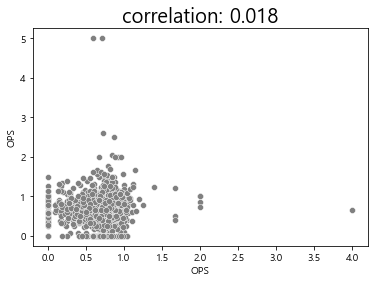

In [24]:
sns.scatterplot(regular_new['OPS'], pre_new['OPS'], color='grey')
plt.title('correlation: '+str(np.round(correlation,3)), fontsize=20)
plt.xlabel=('regular OPS')
plt.ylabel=('pre OPS')
plt.show()

- 정규시즌과 프리시즌의 상관관계는 0.018의 값을 얻었다.
- 서로 관련이 없는걸로 보아 프리시즌 데이터는 예측에 사용하지 않는다.